# Finding patterns given by mathematical functions

This interactive application shows how [Khiva library](https://khiva-python.readthedocs.io/en/latest/) can help you to discover patterns in a large sequence. 

In [27]:
import matplotlib.pyplot as plt
import khiva as kv
from random import randint
from ipywidgets import interact, IntSlider, widgets 
import math
import numpy as np

%config IPCompleter.greedy=True
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 5]

## Backend
Prints the backend being used. The CPU, CUDA and OPENCL backends are available in Khiva.  
  
> This interactive application is being executed in **hub.mybinder** which doesn't provide a GPU and its CPU is limited.

In [28]:
print(kv.get_backend())

KHIVABackend.KHIVA_BACKEND_OPENCL


## Time series generation
Next cell generates a random sequence of 10000 data points.

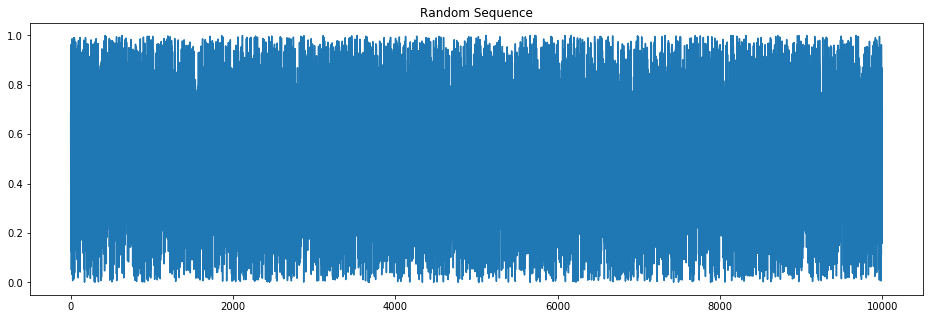

In [29]:
time_series = np.random.rand(10000)
plt.plot(range(len(time_series)), time_series)
plt.title("Random Sequence")
plt.show()

## Pattern discovery

Now, you can select the target function that you want find in the large random sequence previously generated.

The next two plots show the selected target pattern and the most similar subsequence respectively. You can select a target pattern among all the following functions: f(x)=x, f(x)=√x, f(x)=x^2, f(x)=x^3, f(x)=log(x).

Then, we execute the **stomp()** method to compute the matrix profile. Later, we execute the **find_best_n_motifs()** method to plot the most similar subsequence.

In [30]:
def discover_motif(function, range_selected):
    subsequence = []
    for i in range(range_selected[0], range_selected[1] + 1):
        if(function == "n"):
            subsequence.append(i)
        elif(function == "√n"):
            subsequence.append(i**(1/2))
        elif(function == "n^2"):
            subsequence.append(i*i)
        elif(function == "n^3"):
            subsequence.append(i*i*i)
        elif(function == "log(n)"):
            subsequence.append(math.log(i))

    a = kv.Array(time_serie, khiva_type=kv.dtype.f64)
    b = kv.Array(subsequence, khiva_type=kv.dtype.f64)

    distance, profile = kv.stomp(a, b, len(range(range_selected[0], range_selected[1])))
    distance_motif, index_motif, index_subsequence_motif = kv.find_best_n_motifs(distance, profile, 1)

    index_motif = index_motif.to_numpy()
    index_subsequence_motif = index_subsequence_motif.to_numpy()
    a = a.to_numpy()
    window=len(range_selected)//2
   
    plt.plot(range(range_selected[0], range_selected[1] +1), subsequence)
    plt.title("Selected pattern")
    plt.show()
    
    plt.plot(range(index_motif - window, index_motif + window), a[index_motif -window:index_motif + window])
    plt.plot(range(index_motif, (index_motif + len(range(range_selected[0], range_selected[1] + 1)))), a[index_motif: (index_motif + len(range(range_selected[0], range_selected[1] +1)))])
    plt.title("Most similar subsequence")
    plt.show()

interact(discover_motif,  
        function = widgets.Dropdown(
        options=['n', "√n", "n^2", "n^3", "log(n)"],
        value='n',
        description='Function:',
        disabled=False,
    ), 
        range_selected = widgets.IntRangeSlider(
        value=[0, 6],
        min=-15,
        max=15,
        step=1,
        description='Range:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
    ));

interactive(children=(Dropdown(description='Function:', options=('n', '√n', 'n^2', 'n^3', 'log(n)'), value='n'…